## Problem Statement:
Bigmart CEO wants to understand the customers who can converge easily [Target Customers] so that the marketing team can have a sense and plan the strategy accordingly

So, being an Analyst, you must

1.	Achieve customer segmentation using the machine learning algorithm (KMeans Clustering) in Python
2.	Identify target customers with whom you can start marketing strategy.


In [13]:
#IMPORT THE REQUIRED LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
customer = pd.read_csv('/content/drive/MyDrive/Datasets/Bigmart.csv')
customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#Check the shape

customer.shape

(200, 5)

In [4]:
#Checking for any null data

customer.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


##Segregate the columns to be clustered (Age and Spending Score (1-100))

In [8]:
# considering the columns we have to cluster

y = customer.iloc[:,[2,4]].values

## Identify the value of K using Elbow curve

In [10]:
inertia_list = []
for num_clusters in np.arange(1,21):
  kmeans =KMeans(n_clusters=num_clusters) 
  kmeans.fit(y)
  inertia_list.append(kmeans.inertia_)


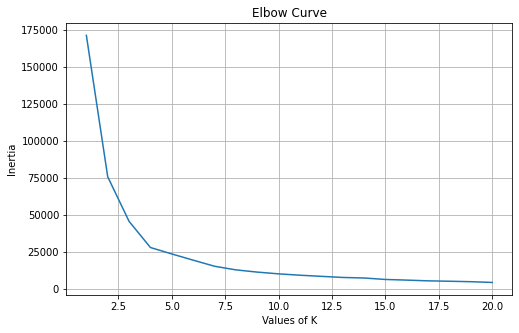

In [14]:
#Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, 21), inertia_list) 
plt.grid(True)
plt.xlabel('Values of K') 
plt.ylabel('Inertia')
plt.title('Elbow Curve') 
plt.show()


From above, we select the optimum value of K by determining the Elbow Point - a point after which the inertia starts decreasing linearly. In this case, we can select the value of K as 4

## Create, fit and predict K-means model with the help of clusters found by Elbow method

In [15]:
kmeansmodel = KMeans(n_clusters= 4, init='k-means++', random_state=0) 
y_kmeans= kmeansmodel.fit_predict(y)

K-means starts with allocating cluster centers randomly and then looks for "better" solutions. K-means++ starts with allocation one cluster center randomly and then searches for other centers given the first one

Hence we use K-means++

##Calculate the centroids of each clusters

In [16]:
centroids = kmeans.cluster_centers_ 
centroids

array([[59.55555556, 10.55555556],
       [34.25      , 59.        ],
       [32.25      , 73.55      ],
       [65.1       , 45.        ],
       [48.29411765, 45.58823529],
       [35.        ,  5.2       ],
       [34.73333333, 92.93333333],
       [49.66666667, 30.44444444],
       [19.625     , 44.5       ],
       [32.5       , 24.16666667],
       [29.375     , 41.75      ],
       [22.11111111, 76.88888889],
       [50.88888889, 55.55555556],
       [65.44444444, 55.11111111],
       [48.5       ,  8.66666667],
       [42.9       , 16.4       ],
       [22.8       , 56.        ],
       [38.55555556, 36.55555556],
       [20.6       ,  7.6       ],
       [27.30769231, 87.46153846]])

##Visualize customer based on their Age and Spending Score (1-100)

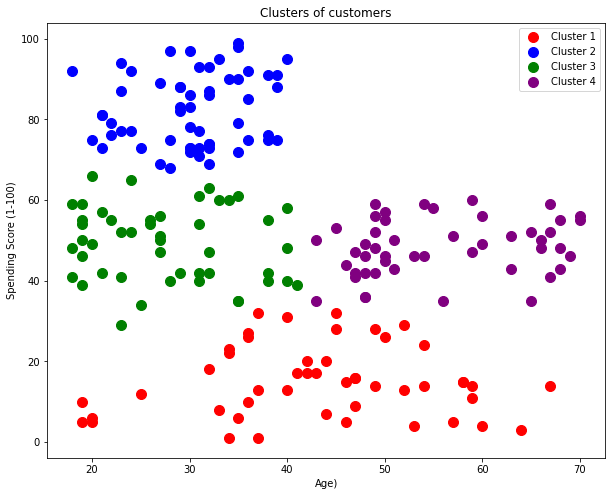

In [18]:
plt.figure(figsize=(10,8))

plt.scatter(y[y_kmeans == 0,0], y[y_kmeans == 0,1], s=100, c='red', label='Cluster 1')
plt.scatter(y[y_kmeans == 1,0], y[y_kmeans == 1,1], s=100, c='blue', label='Cluster 2')
plt.scatter(y[y_kmeans == 2,0], y[y_kmeans == 2,1], s=100, c='green', label='Cluster 3')
plt.scatter(y[y_kmeans == 3,0], y[y_kmeans == 3,1], s=100, c='purple', label='Cluster 4')

plt.title('Clusters of customers') 
plt.xlabel('Age)')
plt.ylabel('Spending Score (1-100)') 
plt.legend()
plt.show()




We have 4 clusters of customer based on Age and Spending Score (1-100):

 

*   Cluster-1 (Red): Customers of this group have a low score no matter the age. Perhaps the marketing team should develop a different strategy and a different approach to giving these costumers a new perspective which will increase their scores

*   Cluster-2 (Blue): These customers are with highest spending score. The marketing team should pay close attention to retain these customers


*   Cluster-3 (Green): Customers of this group are young and adults age < 40 with medium scores between 35 to 75. To increase this group's count, maybe the marketing team can create new actions for young public like games, customized products, and others


*   Cluster-4 (Purple): Customers of this group are 40 and above whose scores are medium. To increase this group count, the marketing team can come up with calm places inside the mall, like new restaurants, typical food courts, and others